# **Group 8 Project Proposal - User Knowledge Modeling Data Set**
Authors: Minting Fu, Zeti Batrisha Jamiluddin Amini, Liz Ji, Caroline Zhang

## INTRODUCTION

In this project, we will study a data set of <a href="https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling" target="_blank">403 real user knowledge status in the area of Electrical DC Machines</a>, which is originated from the Ph.D. Thesis.

We would like to investigate this question through our project:

* Is there a relationship between STG, SCG, STR, LPR, PEG and UNS?


The user modeling system classifies UNS (the knowledge level of users) depending on the real-values of 5 attributes. They are:

* STG : the degree of study time for goal object materails.
* SCG : the degree of repetition number of user for goal object materails.
* STR : the degree of study time of user for related objects with goal object.
* LPR : the exam performance of user for related objects with goal object.
* PEG : the exam performance of user for goal objects.
* UNS : the knowledge level of user.

## Citation
Dua, D. and Graff, C. (2019). <a href="http://archive.ics.uci.edu/ml" target="_blank">UCI Machine Learning Repository</a>. Irvine, CA: University of California, School of Information and Computer Science.

H. T. Kahraman, Sagiroglu, S., Colak, I., Developing intuitive knowledge classifier and modeling of users' domain dependent data in web, Knowledge Based Systems, vol. 37, pp. 283-295, 2013.

## Data Analysis

In [7]:
#Import the pacakge we need to analyze the data
library(readxl)
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [8]:
# download the file from the website
url <- 'https://archive.ics.uci.edu/ml/machine-learning-databases/00257/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls'
download.file(url, destfile='data/user_knowledge_data.xls')

# read and clean the training data and the test data
training_data <- read_excel('data/user_knowledge_data.xls', sheet=2, range='A1:F259') %>% 
                mutate(UNS = as_factor(UNS)) 
print("Training Data")
training_data

test_data <- read_excel('data/user_knowledge_data.xls', sheet=3, range='A1:F146') %>% 
                mutate(UNS = as_factor(UNS))

print("Test Data")
test_data


[1] "Training Data"


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
⋮,⋮,⋮,⋮,⋮,⋮
0.54,0.82,0.71,0.29,0.77,High
0.50,0.75,0.81,0.61,0.26,Middle
0.66,0.90,0.76,0.87,0.74,High


[1] "Test Data"


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.10,0.50,0.26,0.05,Very Low
0.05,0.05,0.55,0.60,0.14,Low
0.08,0.18,0.63,0.60,0.85,High
⋮,⋮,⋮,⋮,⋮,⋮
0.56,0.60,0.77,0.13,0.32,Low
0.66,0.68,0.81,0.57,0.57,Middle
0.68,0.64,0.79,0.97,0.24,Middle


**According to the two tables above, we can see both of them are tidy, since each row is a single observation, each column is a single variable and each value is a single cell.**

**We also notice that `the proportion of the training_data is around 64%`, and `the proportion of the test data is around 36%`.**

In [9]:
# summarise the maximum value of each predictors
training_data_max <- training_data %>%
                     select(-UNS) %>%
                     map_df(max, na.rm = TRUE)
print("The maximum value of each predictors")
training_data_max

# summarise the minimum value of each predictors
training_data_min <- training_data %>%
                     select(-UNS) %>%
                     map_df(min, na.rm = TRUE)
print("The minimum value of each predictors")
training_data_min

# summarise the average value of each predictors
training_data_avg <- training_data %>%
                     select(-UNS) %>%
                     map_df(mean, na.rm = TRUE)
print("The average value of each predictors")
training_data_avg

[1] "The maximum value of each predictors"


STG,SCG,STR,LPR,PEG
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.99,0.9,0.95,0.99,0.93


[1] "The minimum value of each predictors"


STG,SCG,STR,LPR,PEG
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0


[1] "The average value of each predictors"


STG,SCG,STR,LPR,PEG
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.3711473,0.3556744,0.4680039,0.4327132,0.4585388


**According to the tables above, we can see the range of each variable is :**
* The range of STG, the degree of study time for goal object materails, is [0, 0.99].
* The range of SCG, the degree of repetition number of user for goal object materails, is [0, 0.9].
* The range of STR, the degree of study time of user for related objects with goal object, is [0, 0.95].
* The range of LPR, the exam performance of user for related objects with goal object, is [0, 0.99].
* The range of PEG, the exam performance of user for goal objects, is [0, 0.93].


In [11]:
# Determine how many rows have missing data for each variable
stg_miss <- sum(is.na(training_data$STG))
sprintf("The number of missing data in STG: %s", stg_miss)

scg_miss <- sum(is.na(training_data$SCG))
sprintf("The number of missing data in STG: %s", scg_miss)

str_miss <- sum(is.na(training_data$STR))
sprintf("The number of missing data in STG: %s", str_miss)

lpr_miss <- sum(is.na(training_data$LPR))
sprintf("The number of missing data in STG: %s", lpr_miss)

peg_miss <- sum(is.na(training_data$PEG))
sprintf("The number of missing data in STG: %s", peg_miss)

[1] "The number of missing data in STG: 0"

[1] "The number of missing data in STG: 0"

[1] "The number of missing data in STG: 0"

[1] "The number of missing data in STG: 0"

[1] "The number of missing data in STG: 0"

## Data Visualization

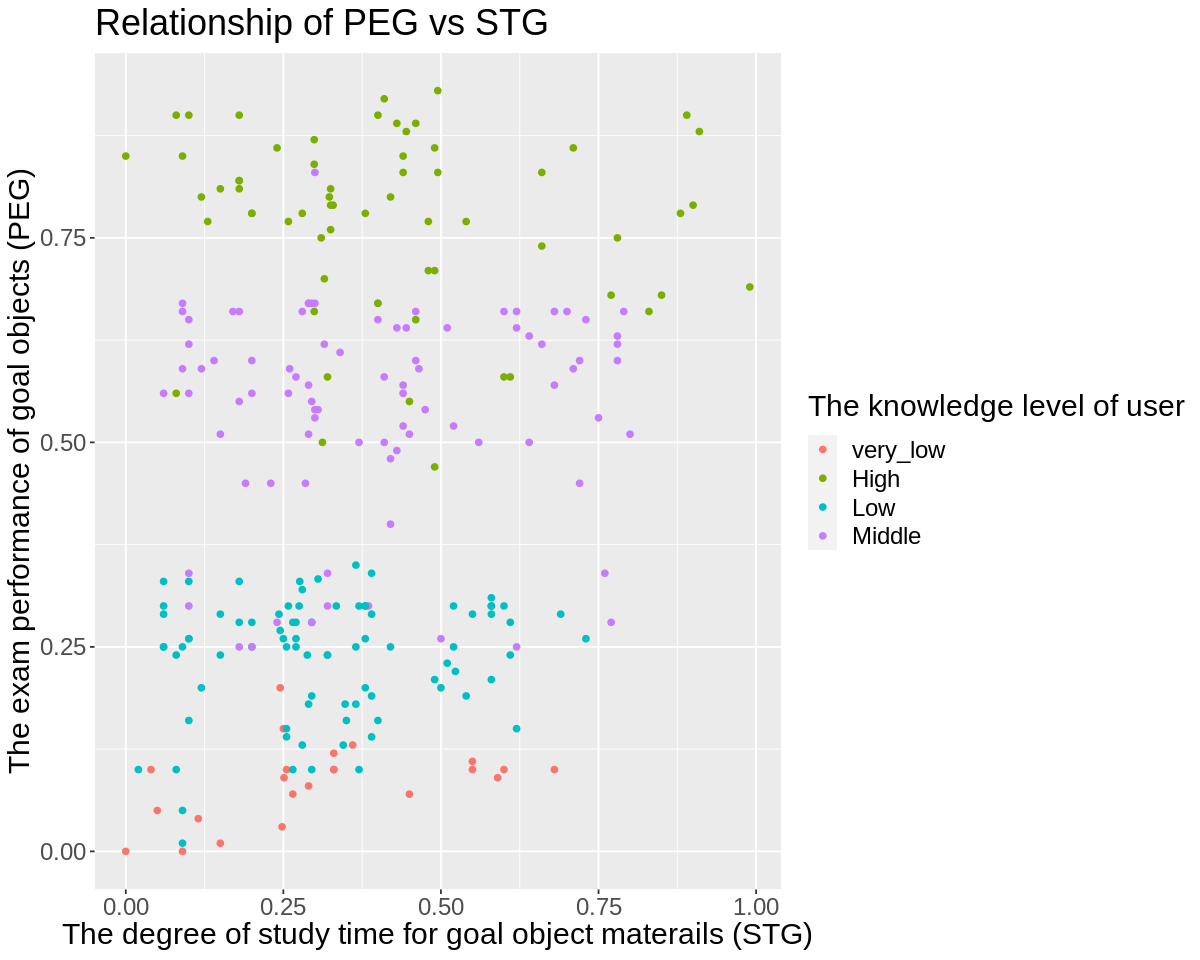

In [15]:
# Scatterplot of PEG vs STG
options(repr.plot.width = 10, repr.plot.height = 8)
peg_vs_stg <- training_data %>%
            ggplot(aes(x = STG, y = PEG , color = UNS)) +
            geom_point() +
            labs(x = "The degree of study time for goal object materails (STG)", 
                 y = "The exam performance of goal objects (PEG)", 
                 color = "The knowledge level of user", 
                 title = "Relationship of PEG vs STG") +
            theme(text = element_text(size = 18))
peg_vs_stg

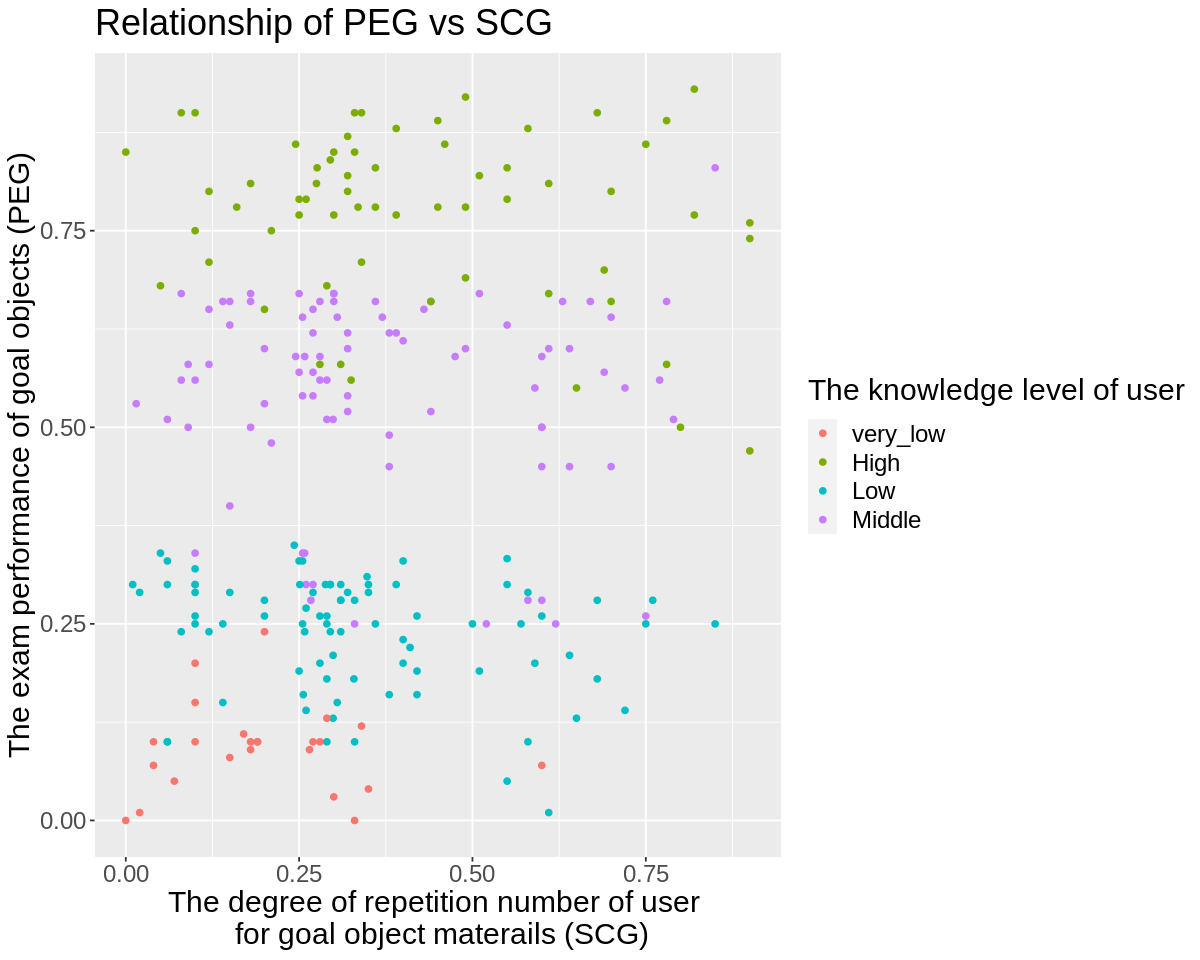

In [19]:
# Scatterplot of PEG vs SCG
peg_vs_scg <- training_data %>%
            ggplot(aes(x = SCG, y = PEG , color = UNS)) +
            geom_point() +
            labs(x = "The degree of repetition number of user \n for goal object materails (SCG)", 
                 y = "The exam performance of goal objects (PEG)", 
                 color = "The knowledge level of user", 
                 title = "Relationship of PEG vs SCG") +
            theme(text = element_text(size = 18))
peg_vs_scg

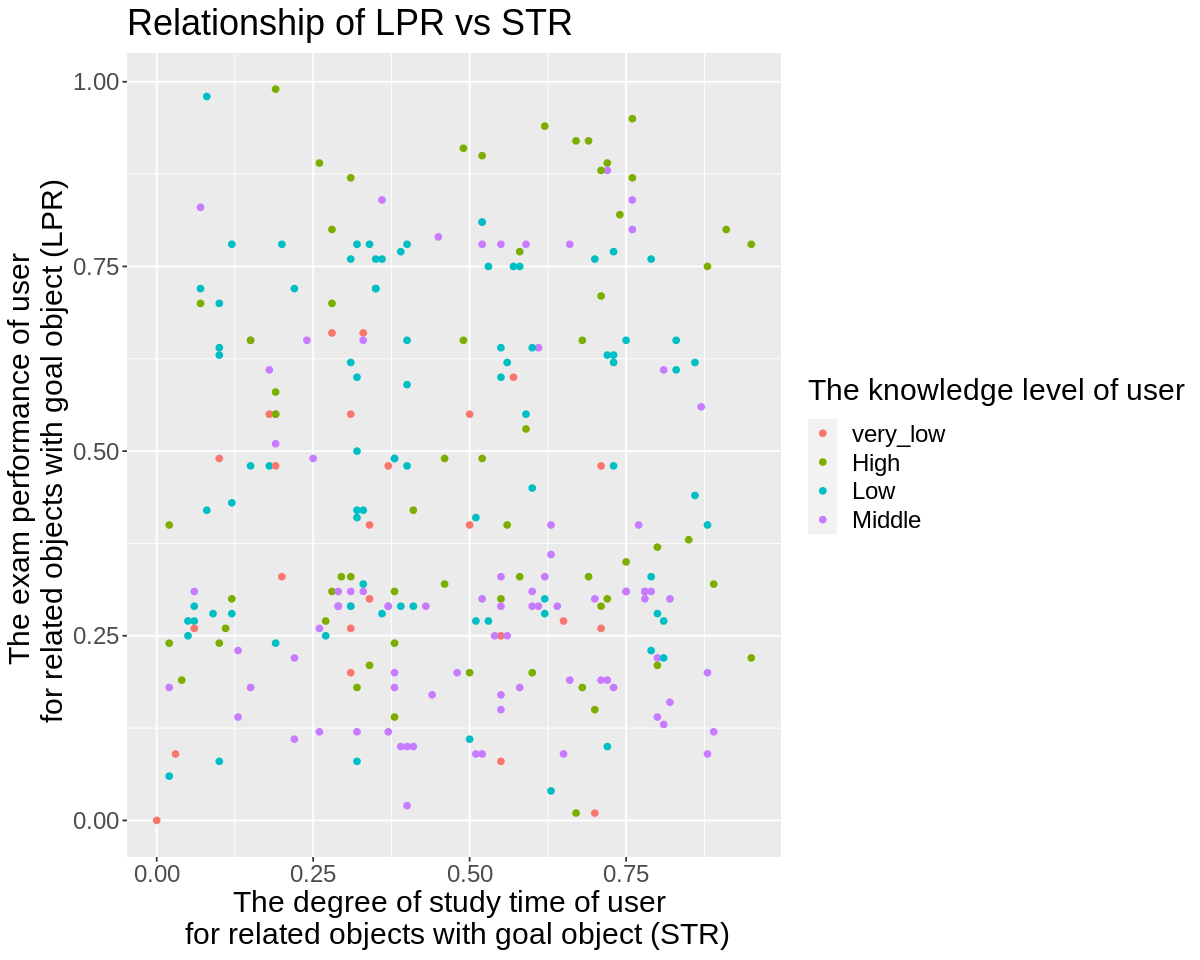

In [20]:
# Scatterplot of LPR vs STR
lpr_vs_str <- training_data %>%
            ggplot(aes(x = STR, y = LPR , color = UNS)) +
            geom_point() +
            labs(x = "The degree of study time of user \n for related objects with goal object (STR)", 
                 y = "The exam performance of user \n for related objects with goal object (LPR)", 
                 color = "The knowledge level of user", 
                 title = "Relationship of LPR vs STR") +
            theme(text = element_text(size = 18))
lpr_vs_str

## Method we use

* Our goal is to predict UNS, the knowledge level of different users, so the first step is to determine which factors would be predictors by creating scatterplots and coloring the knowledge level to indicate relationships between different factors. 

* Since we are predicting a categorical variable, we need to use classification algorithm. We will use cross-validation to check different models with different predictors for answering our question. We will also use cross-validation to find the best K value.  

* After we select predictors and K, we will train our model and test it with testing data


## Expected outcomes and expectations

For example, we are expected to find a positive relationship between PEG (the exam performance of user for goal objects) and STG (the degree of study time for goal object materails), related to UNS. 

The finding could lead to our decision in selecting predictors and it's also beneficial for students to find a better and more efficient way to study, and gain higher grades in the exams.
 
However, there are some questions we should consider at in the future:
We noticed that the data does not follow a direct relationship, and there are four distinct group clustering in the scatter plot which means there might be lurking variables that should be considered. In future study, we should use clustering algorithm to visualize our data in a better way.
 
